# IMPORTS

In [1]:
import re
import sys
import nltk
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup

In [3]:
%matplotlib inline

# Exercise 1

Search the Web for “spoof newspaper headlines,” to find such gems as: British
Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant.
Manually tag these headlines to see whether knowledge of the part-of-speech tags
removes the ambiguity.

In [4]:
headline1 = nltk.word_tokenize('British Left Waffles on Falkland Islands')
nltk.pos_tag(headline1)

[('British', 'JJ'),
 ('Left', 'NNP'),
 ('Waffles', 'NNP'),
 ('on', 'IN'),
 ('Falkland', 'NNP'),
 ('Islands', 'NNP')]

In [5]:
headline2 = nltk.word_tokenize('Juvenile Court to Try Shooting Defendant')
nltk.pos_tag(headline2)

[('Juvenile', 'NNP'),
 ('Court', 'NNP'),
 ('to', 'TO'),
 ('Try', 'VB'),
 ('Shooting', 'NNP'),
 ('Defendant', 'NNP')]

# Exercise 2

Working with someone else, take turns picking a word that can be either a noun
or a verb (e.g., contest); the opponent has to predict which one is likely to be the
most frequent in the Brown Corpus. Check the opponent’s prediction, and tally
the score over several turns.

In [6]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist

In [7]:
cfd = ConditionalFreqDist(
    (word.lower(), tag) 
    for (word, tag) in brown.tagged_words(tagset='universal')
)

In [8]:
cfd['contest'].max()

'NOUN'

In [9]:
cfd['test'].max()

'NOUN'

In [10]:
cfd['work'].max()

'NOUN'

# Exercise 3

Tokenize and tag the following sentence: They wind back the clock, while we
chase after the wind. What different pronunciations and parts-of-speech are
involved?

In [11]:
sent = nltk.word_tokenize('They wind back the clock, while we chase after the wind')

In [12]:
nltk.pos_tag(sent, tagset='universal')

[('They', 'PRON'),
 ('wind', 'VERB'),
 ('back', 'ADV'),
 ('the', 'DET'),
 ('clock', 'NOUN'),
 (',', '.'),
 ('while', 'ADP'),
 ('we', 'PRON'),
 ('chase', 'VERB'),
 ('after', 'ADP'),
 ('the', 'DET'),
 ('wind', 'NOUN')]

According to https://dictionary.cambridge.org/dictionary/english/wind

wind [waɪnd] - verb, to turn or cause something to turn

wind [wɪnd] - noun, a current of air moving approximately horizontally, especially one strong enough to be felt

# Exercise 4

Review the mappings in Table 5-4. Discuss any other examples of mappings you
can think of. What type of information do they map from and to?

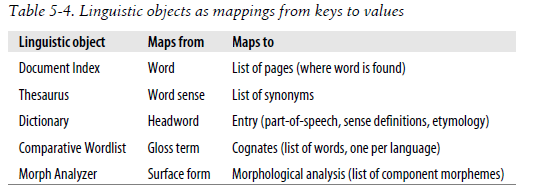

Pronunciation dictionary maps a word to its pronunciation

Sentiment dictionary maps a word to its sentiment value

# Exercise 5

Using the Python interpreter in interactive mode, experiment with the dictionary
examples in this chapter. Create a dictionary d, and add some entries. What happens
whether you try to access a non-existent entry, e.g., d['xyz']?

In [13]:
d = {}
d['a'] = 1
d['b'] = 2
d['xyz']

KeyError: 'xyz'

# Exercise 6

Try deleting an element from a dictionary d, using the syntax del d['abc']. Check
that the item was deleted.

In [14]:
del d['b']
d['b']

KeyError: 'b'

# Exercise 7

Create two dictionaries, d1 and d2, and add some entries to each. Now issue the
command d1.update(d2). What did this do? What might it be useful for?

In [15]:
d1 = {'a': 1, 'b': 2}
d2 = {'a': 1.1, 'c': 3}

In [16]:
d1.update(d2)  # .update method adds new key-value pairs as well as updates existing ones
d1

{'a': 1.1, 'b': 2, 'c': 3}

# Exercise 8

Create a dictionary e, to represent a single lexical entry for some word of your
choice. Define keys such as headword, part-of-speech, sense, and example, and assign
them suitable values.

In [17]:
e = {
    'successful': {
        'headword': 'success',
        'part-of-speech': 'ADJ',
        'sense': 'accomplishing an aim or purpose',
        'example': 'a successful attack on the town'
    }
}

In [18]:
e['successful']['sense']

'accomplishing an aim or purpose'

# Exercise 9

Satisfy yourself that there are restrictions on the distribution of go and went, in
the sense that they cannot be freely interchanged in the kinds of contexts illustrated
in (3), Section 5.7.

a. Go away!
b. He sometimes goes to the cafe.
c. All the cakes have gone.
d. We went on the excursion.

In [19]:
from nltk.corpus import brown

In [20]:
brown_text = nltk.Text(brown.words())

In [21]:
brown_text.concordance('go')

Displaying 25 of 626 matches:
struction bonds . The bond issue will go to the state courts for a friendly te
ress text still had `` quite a way to go '' toward completion . Decisions are 
 replied , `` I would say it's got to go thru several more drafts '' . Salinge
ause the levy is already scheduled to go up by 1 per cent on that date to pay 
irst year , 1963 . Both figures would go higher in later years . Other parts o
lion dollars the first year and would go up to 21 millions by 1966 . The Presi
said yesterday he would be willing to go before the city council `` or anyone 
red would know what to do or where to go in the event of an enemy attack . The
e another . Riverside residents would go to the Seekonk assembly point . Mr. H
nk E. Smith as the one most likely to go , the redistricting battle will put t
e battle . Then he could tell them to go home , while the administration conti
pinion as to how far the board should go , and whose advice it should follow .
n to where the parents

In [22]:
brown_text.concordance('went')

Displaying 25 of 507 matches:
ade good his promise . `` Everything went real smooth '' , the sheriff said . 
axation . Under committee rules , it went automatically to a subcommittee for 
e . And after several correspondents went into Pathet Lao territory and expose
the Kansas City scoring in the sixth went like this : Lumpe worked a walk as t
his season to 13 straight before one went astray last Saturday night in the 41
nd caught one pass for 13 yards . He went into the Army in March , 1957 , and 
m Monday , ran for 30 minutes , then went in , while the reserves scrimmaged f
tchie of the Ogden Standard Examiner went to his compartment to talk with him 
pped into his second shot . The ball went off in a majestic arc , an out-of-bo
 rare sense of humor . Everywhere he went in town , people sidled up , gave hi
e is where a man was born , reared , went to school and , most particularly , 
 off for good behavior . He promptly went to communist East Germany . The magi
in the Skipjack . With

# Exercise 10

Train a unigram tagger and run it on some new text. Observe that some words
are not assigned a tag. Why not?

In [23]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger

In [24]:
unigram_tagger = UnigramTagger(brown.tagged_sents())

In [25]:
unigram_tagger.tag(['Train', 'a', 'unigram', 'tagger', 'and',
                    'run', 'it', 'on', 'some', 'new', 'text'])

[('Train', 'NN-TL'),
 ('a', 'AT'),
 ('unigram', None),
 ('tagger', None),
 ('and', 'CC'),
 ('run', 'VB'),
 ('it', 'PPS'),
 ('on', 'IN'),
 ('some', 'DTI'),
 ('new', 'JJ'),
 ('text', 'NN')]

Because the unigram_tagger didn't see such words as 'unigram' and 'tagger' during training. And there was not any backoff tagger.

# Exercise 11

Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger
and run it on some new text. Experiment with different settings for the affix length
and the minimum word length. Discuss your findings.

In [26]:
from nltk.tag import AffixTagger
from nltk.corpus import brown

In [27]:
sent = nltk.word_tokenize('They wind back the clock, while we chase after the wind')

In [28]:
affix_tagger = AffixTagger(brown.tagged_sents(tagset='universal'))
print(affix_tagger.tag(sent))

[('They', None), ('wind', None), ('back', None), ('the', None), ('clock', 'NOUN'), (',', None), ('while', 'ADP'), ('we', None), ('chase', 'NOUN'), ('after', 'NOUN'), ('the', None), ('wind', None)]


In [29]:
affix_tagger = AffixTagger(
    train=brown.tagged_sents(tagset='universal'),
    affix_length=-2,
    min_stem_length=1
)
print(affix_tagger.tag(sent))

[('They', 'PRON'), ('wind', 'CONJ'), ('back', 'NOUN'), ('the', 'DET'), ('clock', 'NOUN'), (',', None), ('while', 'ADJ'), ('we', None), ('chase', 'NOUN'), ('after', 'NOUN'), ('the', 'DET'), ('wind', 'CONJ')]


AffixTagger shows bad performance in tagging short and long words. There is a trade-off between affix_length and min_stem_length.

# Exercise 12

Train a bigram tagger with no backoff tagger, and run it on some of the training
data. Next, run it on some new data. What happens to the performance of the
tagger? Why?

In [133]:
from nltk.corpus import brown
from nltk.tag import BigramTagger

In [60]:
file_ids = brown.fileids(categories='news')

In [61]:
train_ind = int(len(file_ids) * 0.8)

In [62]:
train_sents = brown.tagged_sents(file_ids[:train_ind])
test_sents = brown.tagged_sents(file_ids[train_ind:])

In [63]:
bigram_tagger = BigramTagger(train_sents)

In [64]:
bigram_tagger.evaluate(train_sents)

0.7911845453747697

In [65]:
bigram_tagger.evaluate(test_sents)

0.09189319220591773

Bigram tagger manages to tag every word in a sentence it saw during
training, but does badly on an unseen sentence. As soon as it encounters a new word, it is unable to assign a tag. 
It cannot tag some word,
even if it was seen during training, simply because it never saw it during training with
a None tag on the previous word. Consequently, the tagger fails to tag the rest of the
sentence. Its overall accuracy score is very low.

# Exercise 13

We can use a dictionary to specify the values to be substituted into a formatting
string. Read Python’s library documentation for formatting strings (http://docs.python.org/lib/typesseq-strings.html) and use this method to display today’s date in
two different formats.

In [66]:
from datetime import datetime

In [67]:
today = datetime.today()

In [68]:
print('{:%Y-%m-%d %H:%M}'.format(today))

2019-08-10 23:55


In [69]:
print('{:%m-%d-%Y %H:%M:%S.%f}'.format(today))

08-10-2019 23:55:14.323869


# Exercise 14

Use sorted() and set() to get a sorted list of tags used in the Brown Corpus,
removing duplicates.

In [70]:
from nltk.corpus import brown

In [71]:
sorted(set(tag for word, tag in brown.tagged_words()))

["'",
 "''",
 '(',
 '(-HL',
 ')',
 ')-HL',
 '*',
 '*-HL',
 '*-NC',
 '*-TL',
 ',',
 ',-HL',
 ',-NC',
 ',-TL',
 '--',
 '---HL',
 '.',
 '.-HL',
 '.-NC',
 '.-TL',
 ':',
 ':-HL',
 ':-TL',
 'ABL',
 'ABN',
 'ABN-HL',
 'ABN-NC',
 'ABN-TL',
 'ABX',
 'AP',
 'AP$',
 'AP+AP-NC',
 'AP-HL',
 'AP-NC',
 'AP-TL',
 'AT',
 'AT-HL',
 'AT-NC',
 'AT-TL',
 'AT-TL-HL',
 'BE',
 'BE-HL',
 'BE-TL',
 'BED',
 'BED*',
 'BED-NC',
 'BEDZ',
 'BEDZ*',
 'BEDZ-HL',
 'BEDZ-NC',
 'BEG',
 'BEM',
 'BEM*',
 'BEM-NC',
 'BEN',
 'BEN-TL',
 'BER',
 'BER*',
 'BER*-NC',
 'BER-HL',
 'BER-NC',
 'BER-TL',
 'BEZ',
 'BEZ*',
 'BEZ-HL',
 'BEZ-NC',
 'BEZ-TL',
 'CC',
 'CC-HL',
 'CC-NC',
 'CC-TL',
 'CC-TL-HL',
 'CD',
 'CD$',
 'CD-HL',
 'CD-NC',
 'CD-TL',
 'CD-TL-HL',
 'CS',
 'CS-HL',
 'CS-NC',
 'CS-TL',
 'DO',
 'DO*',
 'DO*-HL',
 'DO+PPSS',
 'DO-HL',
 'DO-NC',
 'DO-TL',
 'DOD',
 'DOD*',
 'DOD*-TL',
 'DOD-NC',
 'DOZ',
 'DOZ*',
 'DOZ*-TL',
 'DOZ-HL',
 'DOZ-TL',
 'DT',
 'DT$',
 'DT+BEZ',
 'DT+BEZ-NC',
 'DT+MD',
 'DT-HL',
 'DT-NC',
 'DT-TL',
 'D

In [72]:
sorted(set(tag for word, tag in brown.tagged_words(tagset='universal')))

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

# Exercise 15

Write programs to process the Brown Corpus and find answers to the following
questions:<div>

In [73]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist, FreqDist

In [74]:
cfd = ConditionalFreqDist((word.lower(), tag) for word, tag in brown.tagged_words())

a. Which nouns are more common in their plural form, rather than their singular
form? (Only consider regular plurals, formed with the -s suffix.)

In [75]:
[word for word, fd in cfd.items() if fd['NNS'] > fd['NN']]

['irregularities',
 'presentments',
 'thanks',
 'reports',
 'voters',
 'laws',
 'legislators',
 'topics',
 'departments',
 'practices',
 'governments',
 'offices',
 'personnel',
 'policies',
 'steps',
 'funds',
 'services',
 'homes',
 'items',
 'counties',
 'jurors',
 'taxpayers',
 'appraisers',
 'guardians',
 'administrators',
 'fees',
 'wards',
 'procedures',
 'recommendations',
 'juries',
 'citizens',
 'actions',
 'costs',
 'servants',
 'criticisms',
 'influences',
 'concessionaires',
 'prices',
 'deputies',
 'matters',
 'officials',
 'employes',
 'farms',
 'attorneys',
 'responses',
 'petitions',
 'precincts',
 'signatures',
 'dissents',
 'says',
 'courses',
 'names',
 'candidates',
 'relations',
 'years',
 'starts',
 'areas',
 'adjustments',
 'chambers',
 '$100',
 'bonds',
 '$30',
 'courts',
 'sales',
 'contracts',
 'highways',
 '$3',
 '$4',
 'roads',
 'ones',
 'authorities',
 '$50',
 'plans',
 '$10',
 'allowances',
 'details',
 'raises',
 'sessions',
 'members',
 'congressmen',
 

b. Which word has the greatest number of distinct tags? What are they, and what
do they represent?

In [76]:
max_tag_number = max(len(fd) for word, fd in cfd.items())

In [77]:
[word for word, fd in cfd.items() if len(fd) == max_tag_number]

['that']

In [78]:
cfd['that'].most_common()

[('CS', 6464),
 ('DT', 2260),
 ('WPS', 1654),
 ('WPO', 135),
 ('QL', 56),
 ('DT-NC', 6),
 ('DT-TL', 5),
 ('WPS-TL', 3),
 ('WPS-NC', 3),
 ('CS-NC', 2),
 ('WPS-HL', 2),
 ('CS-HL', 1),
 ('DT-HL', 1),
 ('NIL', 1),
 ('WPO-NC', 1)]

CS = Subordinating conjunction<div> DT = singular determiner/quantifier<div> WPS = nominative wh- pronoun<div> WPO = objective wh- pronoun<div> QL = qualifier<div> ...

c. List tags in order of decreasing frequency. What do the 20 most frequent tags
represent?

In [79]:
fd = FreqDist(tag for word, tag in brown.tagged_words())

In [80]:
fd.most_common(20)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

NN = singular or mass noun<div>
IN = preposition<div>
AT = article (a, the, no)<div>
JJ = adjective<div> 
...

d. Which tags are nouns most commonly found after? What do these tags
represent?

In [81]:
fd = FreqDist(
    t2 for (w1, t1), (w2, t2) 
    in nltk.bigrams(brown.tagged_words()) 
    if t1.startswith('N')
)

In [82]:
fd.most_common(10)

[('IN', 60188),
 (',', 34229),
 ('.', 32338),
 ('NN', 16824),
 ('CC', 16080),
 ('NP', 9661),
 ('VBD', 9229),
 ('NNS', 7662),
 ("''", 5008),
 ('MD', 4957)]

IN = preposition<div>
',' = comma<div>
'.' = sentence (. ; ? *)<div>
NN = singular or mass noun<div>
...

# Exercise 16

Explore the following issues that arise in connection with the lookup tagger:<div>
a. What happens to the tagger performance for the various model sizes when am
backoff tagger is omitted?<div>
b. Consider the curve in Figure 5-4; suggest a good size for a lookup tagger that
balances memory and performance. Can you come up with scenarios where it
would be preferable to minimize memory usage, or to maximize performance
with no regard for memory usage?

In [83]:
import matplotlib.pyplot as plt

from nltk.corpus import brown
from nltk.tag import UnigramTagger, DefaultTagger
from nltk.probability import ConditionalFreqDist, FreqDist

In [84]:
%matplotlib inline

In [88]:
def performance(cfd, wordlist, use_backoff=True):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = UnigramTagger(
        model=lt, 
        backoff=DefaultTagger('NN') if use_backoff else None
    )
    return baseline_tagger.evaluate(brown.tagged_sents(categories='science_fiction'))

def performance_plot():
    word_freqs = FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** np.arange(15)
    perfs_backoff = [performance(cfd, words_by_freq[:size]) for size in sizes]
    perfs_no_backoff = [performance(cfd, words_by_freq[:size], False) 
                        for size in sizes]
    plt.plot(sizes, perfs_backoff, '-go', label='with backoff')
    plt.plot(sizes, perfs_no_backoff, '-bo', label='no backout')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.legend()

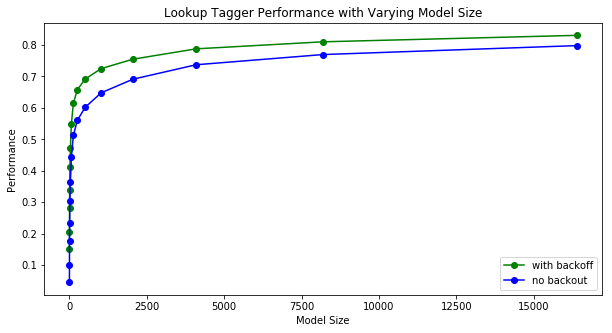

In [89]:
plt.figure(figsize=(10, 5))
performance_plot()
plt.show()

Performance increases when the model size increases, but you can get the higher value of performance earlier using backoff tagger.

The best example for my point of view is using lookup tagger in mobile phones. We have to have a tiny model that performs well. When you have no constraints and your goal is to get the highest performance - feel free to use maximum model size. 

# Exercise 17

What is the upper limit of performance for a lookup tagger, assuming no limit
to the size of its table? (Hint: write a program to work out what percentage of tokens
of a word are assigned the most likely tag for that word, on average.)

In [103]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger
from nltk.probability import ConditionalFreqDist

In [104]:
cfd = ConditionalFreqDist(brown.tagged_words(categories='news'))
lt = {word: fd.max() for word, fd in cfd.items()}

In [105]:
baseline_tagger = UnigramTagger(model=lt)

In [106]:
baseline_tagger.evaluate(brown.tagged_sents(categories='science_fiction'))

0.7978576364892882

# Exercise 18

Generate some statistics for tagged data to answer the following questions:

In [107]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist

In [108]:
cfd = ConditionalFreqDist(brown.tagged_words())

a. What proportion of word types are always assigned the same part-of-speech
tag?

In [109]:
len([fd for fd in cfd.values() if len(fd) == 1]) / len(cfd)

0.8442834971546819

b. How many words are ambiguous, in the sense that they appear with at least
two tags?

In [110]:
len([fd for fd in cfd.values() if len(fd) > 1])

8729

c. What percentage of word tokens in the Brown Corpus involve these ambiguous
words?

In [111]:
sum(fd.N() for fd in cfd.values() if len(fd) > 1) / cfd.N()

0.7864892283102192

# Exercise 19

The evaluate() method works out how accurately the tagger performs on this
text. For example, if the supplied tagged text was [('the', 'DT'), ('dog',
'NN')] and the tagger produced the output [('the', 'NN'), ('dog', 'NN')], then
the score would be 0.5. Let’s try to figure out how the evaluation method works:

a. A tagger t takes a list of words as input, and produces a list of tagged words
as output. However, t.evaluate() is given correctly tagged text as its only
parameter. What must it do with this input before performing the tagging?

Fetch the first component of each word-tag pair

b. Once the tagger has created newly tagged text, how might the evaluate()
method go about comparing it with the original tagged text and computing
the accuracy score?

After tagging flattening is performed then the next step is element-wise comparison

c. Now examine the source code to see how the method is implemented. Inspect
nltk.tag.api.__file__ to discover the location of the source code, and open
this file using an editor (be sure to use the api.py file and not the compiled
api.pyc binary file).

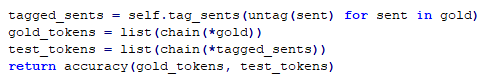

# Exercise 20

Write code to search the Brown Corpus for particular words and phrases according
to tags, to answer the following questions:

In [112]:
from nltk.corpus import brown
from nltk.util import Index
from nltk.probability import FreqDist

In [113]:
brown_tag_index = Index(set((tag, word.lower())
                        for word, tag in brown.tagged_words()))

In [114]:
brown_fd = FreqDist(w.lower() for w in brown.words())

a. Produce an alphabetically sorted list of the distinct words tagged as MD.

In [116]:
sorted(brown_tag_index['MD'])

["c'n",
 'can',
 'colde',
 'could',
 'dare',
 'kin',
 'maht',
 'mai',
 'may',
 'maye',
 'mayst',
 'might',
 'must',
 'need',
 'ought',
 'shall',
 'should',
 'shuld',
 'shulde',
 'wil',
 'will',
 'wilt',
 'wod',
 'wold',
 'wolde',
 'would']

b. Identify words that can be plural nouns or third person singular verbs (e.g.,
deals, flies).

In [117]:
set(brown_tag_index['NNS']) & set(brown_tag_index['VBZ'])

{'accounts',
 'acts',
 'addresses',
 'advances',
 'affects',
 'aids',
 'aims',
 'amounts',
 'answers',
 'appeals',
 'approaches',
 'arches',
 'assaults',
 'associates',
 'attacks',
 'attempts',
 'attributes',
 'backs',
 'bangs',
 'banks',
 'bargains',
 'bars',
 'bases',
 'bats',
 'beats',
 'bellows',
 'belts',
 'bends',
 'benefits',
 'bites',
 'blankets',
 'blots',
 'blows',
 'blueprints',
 'boards',
 'bodies',
 'boils',
 'borders',
 'bores',
 'bottles',
 'bows',
 'breaks',
 'bridges',
 'bristles',
 'bubbles',
 'bugs',
 'bulletins',
 'bullies',
 'burns',
 'butts',
 'calls',
 'caps',
 'captures',
 'cares',
 'casts',
 'catches',
 'causes',
 'censors',
 'centers',
 'challenges',
 'champions',
 'changes',
 'charges',
 'checks',
 'claims',
 'claps',
 'clicks',
 'clouds',
 'clucks',
 'clutches',
 'colors',
 'commands',
 'comments',
 'compounds',
 'compresses',
 'concentrates',
 'concerns',
 'conducts',
 'conflicts',
 'contacts',
 'contracts',
 'contrasts',
 'controls',
 'coordinates',
 'cost

c. Identify three-word prepositional phrases of the form IN + DET + NN (e.g.,
in the lab).

In [118]:
sorted(set(' '.join((w1, w2, w3))
           for (w1, t1), (w2, t2), (w3, t3) 
           in nltk.trigrams(brown.tagged_words()) 
           if (t1, t2, t3) == ('IN', 'AT', 'NN')))

["'bout the saddle",
 "'ceptin' the light",
 'About the murder',
 'Above the tongue',
 'Across the bay',
 'Across the bridge',
 'Across the front',
 'Across the road',
 'Across the street',
 'Across the table',
 'Across the way',
 'After a conversation',
 'After a day',
 'After a dinner',
 'After a flood',
 'After a minute',
 'After a moment',
 'After a pause',
 'After a reception',
 'After a roundup',
 'After a sort',
 'After a supper',
 'After a time',
 'After a while',
 'After a year',
 'After an earthquake',
 'After every money',
 'After every session',
 'After the collapse',
 'After the demise',
 'After the diagnosing',
 'After the game',
 'After the meal',
 'After the meeting',
 'After the pegboard',
 'After the soil',
 'After the spate',
 'After the storm',
 'After the war',
 'Against the ruin',
 'Along the way',
 'Amid a shortage',
 'Amid the crackle',
 'Among the policy',
 'Around the billiard',
 'Around the table',
 'As a result',
 'At a ceremony',
 'At a minimum',
 'At a nod

d. What is the ratio of masculine to feminine pronouns?

In [119]:
masculine_pronouns = ['he', 'him', 'his', 'himself']
feminine_pronouns = ['she', 'her', 'hers', 'herself']

In [120]:
(sum(brown_fd[pronoun] for pronoun in masculine_pronouns) / 
 sum(brown_fd[pronoun] for pronoun in feminine_pronouns))

3.2741427861520624

# Exercise 21

In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.

In [121]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist

In [122]:
target_words = {'adore', 'love', 'like', 'prefer'}
cfd = ConditionalFreqDist(
    (w1, w2)
    for (w1, t1), (w2, t2)
    in nltk.bigrams(brown.tagged_words(tagset='universal'))
    if (t1, t2) == ('ADV', 'VERB') and w2 in target_words
)

In [123]:
cfd.tabulate()

                like   love prefer 
       always      1      1      0 
       dearly      0      1      0 
         even      1      0      0 
    generally      0      0      1 
         just      0      1      0 
         much      0      0      1 
          not      9      1      1 
       rather      1      0      0 
       simply      1      0      0 
spontaneously      0      0      1 
         sure      1      0      0 


# Exercise 22

We defined the regexp_tagger that can be used as a fall-back tagger for unknown
words. This tagger only checks for cardinal numbers. By testing for particular prefix
or suffix strings, it should be possible to guess other tags. For example, we could
tag any word that ends with -s as a plural noun. Define a regular expression tagger
(using RegexpTagger()) that tests for at least five other patterns in the spelling of
words. (Use inline documentation to explain the rules.)

In [124]:
from nltk.tag import RegexpTagger
from nltk.corpus import brown

In [125]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')     # nouns (default)
]

In [126]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [127]:
regexp_tagger.tag(brown.sents()[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

# Exercise 23

Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its accuracy() method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?

In [128]:
regexp_tagger.evaluate(brown.tagged_sents())

0.19537768086586887

In [129]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    ('^the$|^a$', 'AT'),  # determiners
    (r'.*', 'NN')     # nouns (default)
]

In [130]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [131]:
regexp_tagger.evaluate(brown.tagged_sents())

0.2678127303667266

Adding determiners pattern improved the performance by 7%. With the help of objective evaluation, we can control what patterns are good or bad

# Exercise 24

How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of 105 and a tagset size of 102.

In [137]:
from nltk.corpus import brown
from nltk.tag import NgramTagger

In [138]:
file_ids = brown.fileids(categories='news')

In [139]:
train_ind = int(len(file_ids) * 0.8)

In [140]:
train_sents = brown.tagged_sents(file_ids[:train_ind], tagset='universal')
test_sents = brown.tagged_sents(file_ids[train_ind:], tagset='universal')

In [141]:
n_max = 6
for n in range(1, n_max + 1):
    ngram_tagger = NgramTagger(n, train_sents)
    train_accuracy = ngram_tagger.evaluate(train_sents)
    test_accuracy = ngram_tagger.evaluate(test_sents)
    print(n, train_accuracy, test_accuracy)

1 0.9682082011809099 0.8355544864084676
2 0.8824856773934736 0.12845802261246092
3 0.8338577642944001 0.0741400048111619
4 0.856949441512367 0.06018763531392832
5 0.898682445561559 0.0578301659850854
6 0.9396382053178554 0.05754149627134953


In [142]:
V, T = 10 ** 5, 10 ** 2

In [143]:
def estimate_train_data_amount(vocab_size, tagset_size, n):
    return (vocab_size * tagset_size ** (n - 1)) - 1 + n

In [144]:
for n in range(1, n_max + 1):
    print(n, estimate_train_data_amount(V, T, n))

1 100000
2 10000001
3 1000000002
4 100000000003
5 10000000000004
6 1000000000000005


# Exercise 25

Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.

In [155]:
from nltk.corpus import cess_esp
from nltk.tag import UnigramTagger, DefaultTagger, BigramTagger, TrigramTagger

In [156]:
file_ids = cess_esp.fileids()

In [157]:
train_ind = int(len(file_ids) * 0.8)

In [158]:
train_sents = cess_esp.tagged_sents(file_ids[:train_ind])
test_sents = cess_esp.tagged_sents(file_ids[train_ind:])

In [159]:
t0 = DefaultTagger('sps00')
t1 = UnigramTagger(train=train_sents, backoff=t0)
t2 = BigramTagger(train=train_sents, backoff=t1)
t3 = TrigramTagger(train=train_sents, backoff=t2)

In [160]:
for i, tagger in enumerate([t0, t1, t2, t3]):
    print(i, tagger.evaluate(train_sents), tagger.evaluate(test_sents))

0 0.1332220124872949 0.1235578441135751
1 0.9581820821838246 0.806174248864492
2 0.9848594849320855 0.8172014281897452
3 0.9914133347413441 0.8169342498360497


# Exercise 26

 4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

In [164]:
import matplotlib.pyplot as plt

from nltk.corpus import brown
from nltk.tag import UnigramTagger, DefaultTagger

In [165]:
%matplotlib inline

In [166]:
def performance(train_sents, use_backoff=True):
    tagger = UnigramTagger(
        train=train_sents, 
        backoff=DefaultTagger('NN') if use_backoff else None
    )
    return tagger.evaluate(brown.tagged_sents(categories='science_fiction'))

def performance_plot():
    file_ids = brown.fileids(categories='news')
    ratios = np.linspace(0.1, 1, 11)
    perfs_backoff = [
        performance(brown.tagged_sents(file_ids[:int(len(file_ids) * ratio)]))
        for ratio in ratios
    ]
    perfs_no_backoff = [
        performance(brown.tagged_sents(file_ids[:int(len(file_ids) * ratio)]), 
                    use_backoff=False)
        for ratio in ratios
    ]
    
    plt.plot(ratios, perfs_backoff, '-go', label='with backoff')
    plt.plot(ratios, perfs_no_backoff, '-bo', label='no backout')
    plt.title('Unigram Tagger Performance with Varying Model Size')
    plt.xlabel('Ratio')
    plt.ylabel('Performance')
    plt.legend()

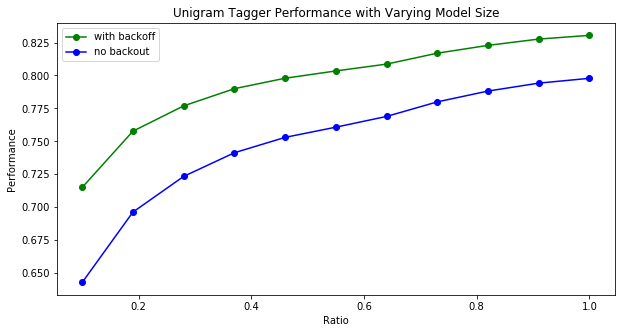

In [167]:
plt.figure(figsize=(10, 5))
performance_plot()
plt.show()

# Exercise 27

Inspect the confusion matrix for the bigram tagger t2 defined in Section 5.5, and
identify one or more sets of tags to collapse. Define a dictionary to do the mapping,
and evaluate the tagger on the simplified data.

In [182]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger, BigramTagger, DefaultTagger, untag
from nltk.metrics import ConfusionMatrix, accuracy

In [183]:
file_ids = brown.fileids(categories='news')

In [184]:
train_ind = int(len(file_ids) * 0.8)

In [185]:
train_sents = brown.tagged_sents(file_ids[:train_ind], tagset='universal')
test_sents = brown.tagged_sents(file_ids[train_ind:], tagset='universal')

In [186]:
t0 = DefaultTagger('NOUN')
t1 = UnigramTagger(train=train_sents, backoff=t0)
t2 = BigramTagger(train=train_sents, backoff=t1)

In [187]:
t2.evaluate(train_sents), t2.evaluate(test_sents)

(0.979478243427898, 0.90873225884051)

In [188]:
gold_tags = [tag 
             for sent in test_sents
             for (word, tag) in sent]

In [189]:
test_tags = [tag 
             for sent in test_sents
             for (word, tag) in t2.tag(untag(sent))]

In [190]:
accuracy(gold_tags, test_tags)

0.90873225884051

In [191]:
cm = ConfusionMatrix(gold_tags, test_tags)
print(cm)

     |                        C         N         P         V      |
     |         A    A    A    O    D    O    N    R    P    E      |
     |         D    D    D    N    E    U    U    O    R    R      |
     |    .    J    P    V    J    T    N    M    N    T    B    X |
-----+-------------------------------------------------------------+
   . |<2687>   .    .    .    .    .    .    .    .    .    .    . |
 ADJ |    .<1098>   .   29    .    .  452    .    .    .    4    . |
 ADP |    .    3<2367>  14    4    .   10    .    .  187    .    . |
 ADV |    .   57   47 <650>   .    1   96    .    .   10    3    . |
CONJ |    .    .    .    . <596>   4    1    .    .    .    .    . |
 DET |    .    .   22    .    2<2389>   2    .    .    .    .    . |
NOUN |    .   55    1    .    .    .<5322>   5    2    .   84    . |
 NUM |    .    .    .    .    .    .   90 <374>   .    .    .    . |
PRON |    .    .   32    .    .    1    .    . <525>   .    .    . |
 PRT |    .    3   66    3    .   

Looks like that it worth to collapse PRT and ADP tags into new NEW_POS tag since tagger often classifies ADP as PRT

In [202]:
collapse_dict = {
    'PRT': 'NEW_POS',
    'ADP': 'NEW_POS'
}

In [203]:
train_sents_new = [
    [(word, tag if tag not in collapse_dict else collapse_dict[tag])
     for word, tag in sent] 
    for sent in train_sents
]

In [204]:
test_sents_new = [
    [(word, tag if tag not in collapse_dict else collapse_dict[tag])
     for word, tag in sent] 
    for sent in test_sents
]

In [205]:
t0 = DefaultTagger('NOUN')
t1 = UnigramTagger(train=train_sents_new, backoff=t0)
t2 = BigramTagger(train=train_sents_new, backoff=t1)

In [206]:
t2.evaluate(train_sents_new), t2.evaluate(test_sents_new)

(0.988391480399654, 0.9203752706278566)

In [207]:
gold_tags_new = [tag 
                 for sent in test_sents_new
                 for (word, tag) in sent]

In [208]:
test_tags_new = [tag 
                 for sent in test_sents_new
                 for (word, tag) in t2.tag(untag(sent))]

In [209]:
accuracy(gold_tags_new, test_tags_new)

0.9203752706278566

In [210]:
cm = ConfusionMatrix(gold_tags_new, test_tags_new)
print(cm)

        |                             N                          |
        |                             E                          |
        |                             W                          |
        |                   C         _    N         P    V      |
        |         A    A    O    D    P    O    N    R    E      |
        |         D    D    N    E    O    U    U    O    R      |
        |    .    J    V    J    T    S    N    M    N    B    X |
--------+--------------------------------------------------------+
      . |<2687>   .    .    .    .    .    .    .    .    .    . |
    ADJ |    .<1097>  32    .    .    .  450    .    .    4    . |
    ADV |    .   57 <648>   .    2   58   96    .    .    3    . |
   CONJ |    .    .    . <596>   4    .    1    .    .    .    . |
    DET |    .    .    .    2<2392>  19    2    .    .    .    . |
NEW_POS |    .    6   17    4    1<3087>  14    .    .    .    . |
   NOUN |    .   54    .    .    .    1<5317>   5    2   90   

# Exercise 28

Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.

In [222]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger, BigramTagger, DefaultTagger, untag
from nltk.metrics import ConfusionMatrix, accuracy

In [217]:
file_ids = brown.fileids(categories='news')

In [218]:
train_ind = int(len(file_ids) * 0.8)

## Original

In [223]:
train_sents = brown.tagged_sents(file_ids[:train_ind], tagset='universal')
test_sents = brown.tagged_sents(file_ids[train_ind:], tagset='universal')

In [224]:
t0 = DefaultTagger('NOUN')
t1 = UnigramTagger(train=train_sents, backoff=t0)
t2 = BigramTagger(train=train_sents, backoff=t1)

In [225]:
t2.evaluate(train_sents), t2.evaluate(test_sents)

(0.979478243427898, 0.90873225884051)

In [226]:
gold_tags = [tag 
             for sent in test_sents
             for (word, tag) in sent]

In [227]:
test_tags = [tag 
             for sent in test_sents
             for (word, tag) in t2.tag(untag(sent))]

In [228]:
accuracy(gold_tags, test_tags)

0.90873225884051

## Truncated

In [229]:
train_sents_trunc = [[(w, t[0]) for w, t in sent] for sent in train_sents]
test_sents_trunc = [[(w, t[0]) for w, t in sent] for sent in test_sents]

In [230]:
t0 = DefaultTagger('NOUN')
t1 = UnigramTagger(train=train_sents_trunc, backoff=t0)
t2 = BigramTagger(train=train_sents_trunc, backoff=t1)

In [231]:
t2.evaluate(train_sents_trunc), t2.evaluate(test_sents_trunc)

(0.9811330215998696, 0.8448400288669714)

In [232]:
gold_tags_trunc = [tag 
                   for sent in test_sents_trunc
                   for (word, tag) in sent]

In [233]:
test_tags_trunc = [tag 
                   for sent in test_sents_trunc
                   for (word, tag) in t2.tag(untag(sent))]

In [234]:
accuracy(gold_tags_trunc, test_tags_trunc)

0.8448400288669714

The performance gap between accuracy on train and test sets is wider than the original one. Overfitting occurred.

# Exercise 29

Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?

In [241]:
from nltk.corpus import brown
from nltk.tag import BigramTagger, untag

In [236]:
train_sent = brown.tagged_sents(tagset='universal')[0]

In [237]:
# Keeps sentence's words the same but change words order
np.random.seed(42)
train_sent_shuffled = train_sent.copy()
np.random.shuffle(train_sent_shuffled)

In [238]:
tagger = BigramTagger(train=[train_sent])

In [239]:
tagger.evaluate([train_sent])

1.0

In [240]:
tagger.evaluate([train_sent_shuffled])

0.0

In [242]:
tagger.tag(untag(train_sent_shuffled))

[('investigation', None),
 ('no', None),
 ('The', None),
 ('place', None),
 ('recent', None),
 ('of', None),
 ('election', None),
 ('Fulton', None),
 ('took', None),
 ('said', None),
 ('County', None),
 ('primary', None),
 ('``', None),
 ('Grand', None),
 ('Jury', None),
 ('any', None),
 ('evidence', None),
 ('irregularities', None),
 ("''", None),
 ('.', None),
 ('an', None),
 ("Atlanta's", None),
 ('produced', None),
 ('that', None),
 ('Friday', None)]

# Exercise 30

Preprocess the Brown News data by replacing low-frequency words with UNK,
but leaving the tags untouched. Now train and evaluate a bigram tagger on this
data. How much does this help? What is the contribution of the unigram tagger
and default tagger now?

In [244]:
from collections import defaultdict
from nltk.corpus import brown
from nltk.tag import DefaultTagger, UnigramTagger
from nltk.probability import FreqDist

In [245]:
file_ids = brown.fileids(categories='news')

In [246]:
train_ind = int(len(file_ids) * 0.8)

In [247]:
train_sents = brown.tagged_sents(file_ids[:train_ind], tagset='universal')
test_sents = brown.tagged_sents(file_ids[train_ind:], tagset='universal')

In [248]:
def ex30(train_sents, test_sents):
    result_df = []
    fd = FreqDist(brown.words(categories='news'))
    for keep_ratio in range(80, 105, 5):
        keep_n = int(fd.B() * keep_ratio / 100)

        dd = defaultdict(lambda: 'UNK')
        dd.update({w: w for w, _ in fd.most_common(keep_n)})

        train_sents_unk = [[(dd[w], t) for (w, t) in sent] for sent in train_sents]
        test_sents_unk = [[(dd[w], t) for (w, t) in sent] for sent in test_sents]

        t0 = DefaultTagger('NOUN')
        t1 = UnigramTagger(train=train_sents_unk)
        t1_t0 = UnigramTagger(train=train_sents_unk, backoff=t0)

        train_acc_t1 = t1.evaluate(train_sents_unk)
        test_acc_t1 = t1.evaluate(test_sents_unk)

        train_acc_t1_t0 = t1_t0.evaluate(train_sents_unk)
        test_acc_t1_t0 = t1_t0.evaluate(test_sents_unk)

        result_df.append([100 - keep_ratio, 
                          train_acc_t1_t0, train_acc_t1, train_acc_t1_t0 - train_acc_t1,
                          test_acc_t1_t0, test_acc_t1, test_acc_t1_t0 - test_acc_t1])
    result_df = pd.DataFrame(data=result_df, 
                             columns=['Unknown, %', 
                                      'Train', 'Train_T1', 'Train_T0', 
                                      'Test', 'Test_T1', 'Test_T0'])
    return result_df

In [249]:
result_df = ex30(train_sents, test_sents)
result_df

,"Unknown, %",Train,Train_T1,Train_T0,Test,Test_T1,Test_T0
0,20,0.961727,0.961727,0.0,0.907096,0.873082,0.034015
1,15,0.964711,0.964711,0.0,0.907096,0.873082,0.034015
2,10,0.968208,0.968208,0.0,0.907096,0.835554,0.071542
3,5,0.968208,0.968208,0.0,0.907096,0.835554,0.071542
4,0,0.968208,0.968208,0.0,0.907096,0.835554,0.071542


Replacing 20% of low-frequency words with UNK didn't show any increase in total test accuracy, but the contribution of unigram and default taggers changed. When we increase the percent of UNKs, unigram tagger's contribution increases while default tagger's contribution decreases. Also, it's worth to note that the performance gap between total train accuracy and total test accuracy becomes larger and larger when the percent of UNKs decreases.

# Exercise 31

Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing pylab.plot() with pylab.semilogx(). What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

In [250]:
import matplotlib.pyplot as plt

from nltk.corpus import brown
from nltk.tag import UnigramTagger, DefaultTagger
from nltk.probability import ConditionalFreqDist, FreqDist

In [251]:
%matplotlib inline

In [253]:
def performance(cfd, wordlist):
    lt = {word: cfd[word].max() for word in wordlist}
    baseline_tagger = UnigramTagger(model=lt, backoff=DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='science_fiction'))

def performance_plot():
    word_freqs = FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    plt.semilogx(sizes, perfs, '-bo')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')

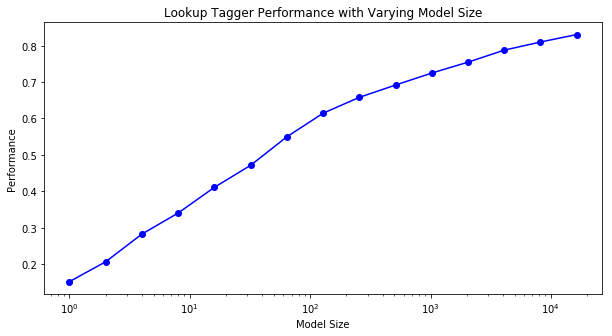

In [254]:
plt.figure(figsize=(10, 5))
performance_plot()
plt.show()

Tagger's performance is a linear function from the model size's logarithm. Gradient shows that if we increase logarithm by 1 then performance increases by ~7-10%

# Exercise 32

Consult the documentation for the Brill tagger demo function, using help(nltk.tag.brill.demo). Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?

In [255]:
from io import StringIO

from nltk.tbl import demo as brill_tagger

In [256]:
help(brill_tagger)

Help on module nltk.tbl.demo in nltk.tbl:

NAME
    nltk.tbl.demo

DESCRIPTION
    # -*- coding: utf-8 -*-
    # Natural Language Toolkit: Transformation-based learning
    #
    # Copyright (C) 2001-2019 NLTK Project
    # Author: Marcus Uneson <marcus.uneson@gmail.com>
    #   based on previous (nltk2) version by
    #   Christopher Maloof, Edward Loper, Steven Bird
    # URL: <http://nltk.org/>
    # For license information, see  LICENSE.TXT

FUNCTIONS
    corpus_size(seqs)
    
    demo()
        Run a demo with defaults. See source comments for details,
        or docstrings of any of the more specific demo_* functions.
    
    demo_error_analysis()
        Writes a file with context for each erroneous word after tagging testing data
    
    demo_generated_templates()
        Template.expand and Feature.expand are class methods facilitating
        generating large amounts of templates. See their documentation for
        details.
        
        Note: training with 500 templat

In [257]:
old_stdout = sys.stdout

result_df = []
fractions = np.arange(0.05, 1.0, 0.05)
for fraction in fractions:
    result_string = StringIO()
    sys.stdout = result_string
    brill_tagger.postag(train=fraction)
    result_df.append((fraction, result_string.getvalue()))

sys.stdout = old_stdout

In [258]:
result_df = pd.DataFrame(result_df, columns=['fraction', 'result_string'])

In [259]:
result_df['train_time'] = (
    result_df['result_string']
    .str.extract('Trained tbl tagger in (.+) seconds')
    .astype(float)
)

result_df['test_score'] = (
    result_df['result_string']
    .str.extract('Accuracy on test set: (.+)')
    .astype(float)
)

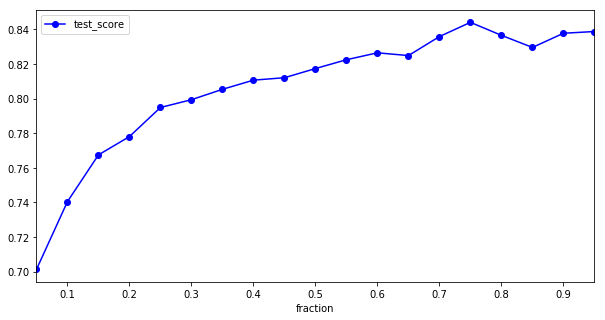

In [260]:
result_df.plot(x='fraction', y='test_score', figsize=(10, 5), style='-bo')
plt.show()

There is a trade-off between corpus size and test performance. If you want to get higher accuracy you need to use more training data (i.e. train you system longer in time)

# Exercise 33

Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. wordi → tagi → tagi+1.

In [261]:
from collections import defaultdict

from nltk.corpus import brown

In [262]:
def ex33(tagged_words):
    dds = defaultdict(lambda: defaultdict(set))
    for (w1, t1), (_, t2) in nltk.bigrams(tagged_words):
        dds[w1.lower()][t1].add(t2)
    return dds

In [263]:
dds = ex33(brown.tagged_words())

# Exercise 34

There are 264 distinct words in the Brown Corpus having exactly three possible
tags.<div>
a. Print a table with the integers 1..10 in one column, and the number of distinct
words in the corpus having 1..10 distinct tags in the other column.<div>
b. For the word with the greatest number of distinct tags, print out sentences
from the corpus containing the word, one for each possible tag.

In [264]:
from nltk.corpus import brown
from nltk.util import Index
from nltk.probability import ConditionalFreqDist
from nltk.tag import untag

In [265]:
w2t = Index(set((w.lower(), t) for w, t in brown.tagged_words(tagset='universal')))

In [266]:
len2w = Index((len(tags), word) for word, tags in w2t.items())

In [267]:
ex34_df = pd.DataFrame(
    data=[(i + 1, len(len2w[i + 1])) for i in range(10)],
    columns=['distinct_tags_count', 'words_count']
)
ex34_df

,distinct_tags_count,words_count
0,1,46407
1,2,3134
2,3,230
3,4,38
4,5,5
5,6,1
6,7,0
7,8,0
8,9,0
9,10,0


In [268]:
ex34_df2 = []
w = len2w[6][0]
for t in w2t[w]:
    for sent in brown.tagged_sents(tagset='universal'):
        if (w, t) in sent or (w.title(), t) in sent:
            print(w, t)
            print('Example: ', ' '.join(untag(sent)))
            print('--------')
            break

down PRT
Example:  Daniel personally led the fight for the measure , which he had watered down considerably since its rejection by two previous Legislatures , in a public hearing before the House Committee on Revenue and Taxation .
--------
down ADP
Example:  Assuming the weather is halfway decent that day , hundreds of thousands of persons will mass along this thoroughfare as President John F. Kennedy and retiring President Dwight D. Eisenhower leave Capitol Hill following the oath-taking ceremonies and ride down this historic ceremonial route .
--------
down ADV
Example:  The set contains `` High Society '' , `` Do What Ory Say '' , `` Down Home Rag '' , `` Careless Love '' , Jazz Me Blues '' , `` Weary Blues '' , `` Original Dixieland One-Step '' , `` Bourbon Street Parade '' , `` Panama '' , `` Toot , Toot , Tootsie '' , `` Oh Didn't He Ramble '' , `` Beale Street Blues '' , `` Maryland , My Maryland '' , `` 1919 Rag '' , `` Eh , La Bas '' , `` Mood Indigo '' , and `` Bugle Call Ra

# Exercise 35

Write a program to classify contexts involving the word must according to the
tag of the following word. Can this be used to discriminate between the epistemic
and deontic uses of must?

epistemic - expressing an opinion about something that is logically very likely<div>
deontic - be obliged to; should (expressing necessity)

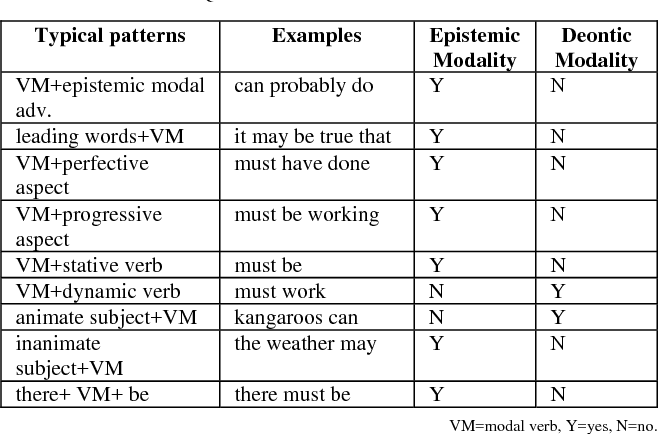

In [269]:
from nltk.corpus import brown
from nltk.probability import FreqDist

In [270]:
fd = FreqDist(
    t2
    for (w1, t1), (w2, t2) in nltk.bigrams(brown.tagged_words())
    if w1.lower() == 'must'
)

In [271]:
fd.most_common()

[('BE', 369),
 ('VB', 354),
 ('HV', 136),
 ('RB', 74),
 ('*', 21),
 (',', 17),
 ('DO', 7),
 ('IN', 6),
 ("''", 3),
 ('VB-HL', 2),
 ('VB-TL', 2),
 ('AT', 2),
 ('CC', 2),
 ('BE-HL', 2),
 ('PPO', 2),
 ('PPS', 2),
 ('NP-HL', 1),
 ('PPSS', 1),
 ('.', 1),
 ('NNS', 1),
 ('VBZ', 1),
 ('HV-TL', 1),
 ('PPLS', 1),
 ('NIL', 1),
 ('RB-HL', 1),
 ('ABX', 1),
 ('NN', 1),
 ('ABN', 1)]

In [272]:
def ex_35(tagged_sent):
    result = []
    epistemic_tags = {'BE', 'BE-HL', 'NN', 'NNS', 'NP-HL'}
    deontic_tags = {'HV', 'HV-TL', 'DO',  'RB', 'RB-HL', 'VB', 'VB-HL', 'VB-TL', 'VBZ'}
    for (w1, t1), (w2, t2) in nltk.bigrams(tagged_sent):
        if w1.lower() == 'must':
            if t2 in epistemic_tags:
                result.append(('epistemic', w1 + ' ' + w2))
            elif t2 in deontic_tags:
                result.append(('deontic', w1 + ' ' + w2))
    return result

In [273]:
ex_35(brown.tagged_sents()[50])

[('epistemic', 'must be')]

In [274]:
ex_35(brown.tagged_sents()[189])

[('deontic', 'must solve')]

# Exercise 36

Create a regular expression tagger and various unigram and n-gram taggers,
incorporating backoff, and train them on part of the Brown Corpus.<div>
a. Create three different combinations of the taggers. Test the accuracy of each
combined tagger. Which combination works best?<div>
b. Try varying the size of the training corpus. How does it affect your results?

In [280]:
from nltk.corpus import brown
from nltk.tag import DefaultTagger, RegexpTagger, UnigramTagger, BigramTagger, TrigramTagger

In [281]:
file_ids = brown.fileids(categories='news')

In [282]:
train_ind = int(len(file_ids) * 0.8)

In [283]:
train_sents = brown.tagged_sents(file_ids[:train_ind])
test_sents = brown.tagged_sents(file_ids[train_ind:])

In [287]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD')  # cardinal numbers
]

In [302]:
results = []
for ratio in np.linspace(0.5, 1, 6):
    partial_train_sents = train_sents[:int(len(train_sents) * ratio)]
    
    t0 = DefaultTagger('NN')
    t_regexp = RegexpTagger(patterns, backoff=t0)
    t1 = UnigramTagger(partial_train_sents, backoff=t_regexp)
    t2 = BigramTagger(partial_train_sents, backoff=t1)
    t3 = TrigramTagger(partial_train_sents, backoff=t2)
    
    results.append((
        ratio,
        t0.evaluate(test_sents),
        t_regexp.evaluate(test_sents),
        t1.evaluate(test_sents),
        t2.evaluate(test_sents), 
        t3.evaluate(test_sents)
    ))

In [303]:
pd.DataFrame(results, columns=['ratio', 'default', 'regexp', 'unigram', 'bigram', 'trigram'])

,ratio,default,regexp,unigram,bigram,trigram
0,0.5,0.120808,0.196777,0.829492,0.834688,0.834544
1,0.6,0.120808,0.196777,0.836132,0.841568,0.841280
2,0.7,0.120808,0.196777,0.838730,0.845129,0.845129
3,0.8,0.120808,0.196777,0.843830,0.850421,0.849170
4,0.9,0.120808,0.196777,0.847101,0.855088,0.852827
5,1.0,0.120808,0.196777,0.849026,0.858552,0.856242


Adding unigram tagger leads to a major boost in performance. Additional bigram tagger helps us to improve our accuracy by ~1% on average. Looks like adding a trigram tagger doesn't provide any consistent improvement.

Also, it worth to note that overall performance on the test set grows when the size of the training dataset becomes larger.

# Exercise 37

Our approach for tagging an unknown word has been to consider the letters of
the word (using RegexpTagger()), or to ignore the word altogether and tag it as a
noun (using nltk.DefaultTagger()). These methods will not do well for texts having
new words that are not nouns. Consider the sentence I like to blog on Kim’s
blog. If blog is a new word, then looking at the previous tag (TO versus NP$) would
probably be helpful, i.e., we need a default tagger that is sensitive to the preceding
tag.<div>
a. Create a new kind of unigram tagger that looks at the tag of the previous word,
and ignores the current word. (The best way to do this is to modify the source
code for UnigramTagger(), which presumes knowledge of object-oriented programming
in Python.)<div>
b. Add this tagger to the sequence of backoff taggers (including ordinary trigram
and bigram taggers that look at words), right before the usual default tagger.<div>
c. Evaluate the contribution of this new unigram tagger.

In [291]:
from nltk.corpus import brown
from nltk.tag import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger

In [292]:
file_ids = brown.fileids(categories='news')

In [293]:
train_ind = int(len(file_ids) * 0.8)

In [294]:
train_sents = brown.tagged_sents(file_ids[:train_ind])
test_sents = brown.tagged_sents(file_ids[train_ind:])

In [295]:
class PreviousTagger(UnigramTagger):

    def context(self, tokens, index, history):
        if index == 0:
            return None
        else:
            return history[index - 1]

In [296]:
sent = ['I', 'like', 'to', 'blog', 'on', 'Kim\'s', 'blog']

In [297]:
t0 = DefaultTagger('NN')
t1 = PreviousTagger(train_sents, backoff=t0)
t2 = UnigramTagger(train_sents, backoff=t1)
t3 = BigramTagger(train_sents, backoff=t2)
t4 = TrigramTagger(train_sents, backoff=t3)

In [298]:
t4.tag(sent)

[('I', 'PPSS'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('blog', 'VB'),
 ('on', 'IN'),
 ("Kim's", 'AT'),
 ('blog', 'NN')]

In [299]:
t4.evaluate(test_sents)

0.828193408708203

In [300]:
t0 = DefaultTagger('NN')
# t1 = PreviousTagger(train_sents, backoff=t0)
t2 = UnigramTagger(train_sents, backoff=t0)
t3 = BigramTagger(train_sents, backoff=t2)
t4 = TrigramTagger(train_sents, backoff=t3)

In [301]:
t4.evaluate(test_sents)

0.8340630262208323

Looks like PreviousTagger didn't help. Its contibution is negative

# Exercise 38

Consider the code in Section 5.5, which determines the upper bound for accuracy
of a trigram tagger. Review Abney’s discussion concerning the impossibility of
exact tagging (Abney, 2006). Explain why correct tagging of these examples requires
access to other kinds of information than just words and tags. How might
you estimate the scale of this problem?

Correct tagging requires you to basically have the entire context of the English language, right? So you need much more information than a computer can ever have. The scale of this problem is such that as you approach an infinite training size you approach maximum accuracy.

# Exercise 39 (Review)

Use some of the estimation techniques in nltk.probability, such as Lidstone or
Laplace estimation, to develop a statistical tagger that does a better job than ngram
backoff taggers in cases where contexts encountered during testing were not
seen during training.

# Exercise 40 (Review)

Inspect the diagnostic files created by the Brill tagger rules.out and
errors.out. Obtain the demonstration code by accessing the source code (at http://www.nltk.org/code) and create your own version of the Brill tagger. Delete some
of the rule templates, based on what you learned from inspecting rules.out. Add
some new rule templates which employ contexts that might help to correct the
errors you saw in errors.out.

# Exercise 41 (Review)

Develop an n-gram backoff tagger that permits “anti-n-grams” such as ["the",
"the"] to be specified when a tagger is initialized. An anti-n-gram is assigned a
count of zero and is used to prevent backoff for this n-gram (e.g., to avoid estimating
P(the | the) as just P(the)).

# Exercise 42 (Review)

Investigate three different ways to define the split between training and testing
data when developing a tagger using the Brown Corpus: genre (category), source
(fileid), and sentence. Compare their relative performance and discuss which
method is the most legitimate. (You might use n-fold cross validation, discussed
in Section 6.3, to improve the accuracy of the evaluations.)